In [1]:
# load the data from dataset

from keras.datasets import  imdb

import matplotlib.pyplot as plt
import numpy as np


In [2]:
((X_train, y_train),(X_test, y_test)) = imdb.load_data(num_words= 10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print(len(X_train))
print(len(X_test))

25000
25000


In [4]:
print(X_train[0])
print()
print(len(X_train[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

218


In [5]:
# we are basically trying to get the mapping . i.e a word is represented by what number 

word_idx = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
# this is giveing me a detionary of words , that is mapped to a number 
print(word_idx.items())

In [7]:
"""
in this block we will decode and see what is the comment is the first X_test[0]
"""

idx_word = dict([value, key] for (key, value) in word_idx.items())

sent = " ".join([ idx_word.get(idx-3, '?') for idx in X_train[0]] )

print(sent)


#NOTE:- we will be using the index values only 

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

**Now we will work on word embedding **

* The way embedding layer works in keras is by passing a value rather than one hot vector. 
* We specify the length of the sentence . 
      * any longer sentence will be cropped 
      * shorter rentence will be padded 

In [8]:
# create a 2-D tensor , so that it can be preoceeed by embedding layer 

from keras.preprocessing import sequence

X_train = sequence.pad_sequences(sequences= X_train, maxlen= 500)
X_test = sequence.pad_sequences(sequences= X_test , maxlen= 500)

In [9]:
X_train.shape , X_test.shape

((25000, 500), (25000, 500))

In [10]:
# Now we create a RNN model 

from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import  SimpleRNN , Dense


#Step 1 : Embedding our data 
model = Sequential()
model.add(Embedding(100000, 64 ))  # why 1Lac ? caz its a (10K * 10K) matrix  # embedding layer dimention (Batch size, max length , k) e.e k = 10 here 

#Step 2: The o/p of embedding is a RNN layer 
model.add(SimpleRNN(units= 32 , ))   # the units is the number of context layer # num of RNN cell is == Batch size(i.e max len)
model.add(Dense(1, activation= "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          6400000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                3104      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 6,403,137
Trainable params: 6,403,137
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer= 'adam', loss = "binary_crossentropy" , metrics=['acc'])

In [13]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [14]:
es = EarlyStopping(monitor="val_acc", min_delta= 0.1 , patience= 4, verbose= 1 )
mc = ModelCheckpoint(monitor= "val_acc", filepath="bestmodel.h5", verbose= 1, save_best_only= True)

In [15]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10 , batch_size= 128, callbacks=[es,mc])

Epoch 1/10
157/157 [==============================] - 59s 355ms/step - loss: 0.6775 - acc: 0.5593 - val_loss: 0.7815 - val_acc: 0.5330

Epoch 00001: val_acc improved from -inf to 0.53300, saving model to bestmodel.h5
Epoch 2/10
157/157 [==============================] - 56s 354ms/step - loss: 0.5283 - acc: 0.7420 - val_loss: 0.4679 - val_acc: 0.7824

Epoch 00002: val_acc improved from 0.53300 to 0.78240, saving model to bestmodel.h5
Epoch 3/10
157/157 [==============================] - 56s 357ms/step - loss: 0.3358 - acc: 0.8619 - val_loss: 0.4086 - val_acc: 0.8206

Epoch 00003: val_acc improved from 0.78240 to 0.82060, saving model to bestmodel.h5
Epoch 4/10
157/157 [==============================] - 56s 354ms/step - loss: 0.2091 - acc: 0.9238 - val_loss: 0.4151 - val_acc: 0.8340

Epoch 00004: val_acc improved from 0.82060 to 0.83400, saving model to bestmodel.h5
Epoch 5/10
157/157 [==============================] - 55s 352ms/step - loss: 0.1238 - acc: 0.9597 - val_loss: 0.4698 - val_

In [16]:
history = hist.history

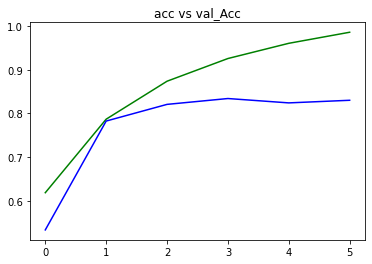

In [17]:
plt.plot(history['acc'], c = 'green')
plt.plot(history['val_acc'], c = 'blue')
plt.title("acc vs val_Acc")
plt.show()

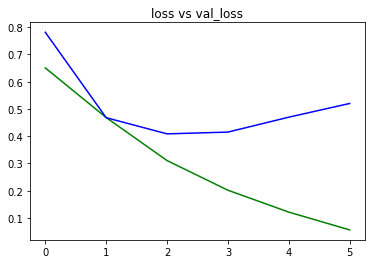

In [18]:
plt.plot(history['loss'], c = 'green')
plt.plot(history['val_loss'], c = 'blue')
plt.title("loss vs val_loss")
plt.show()

In [19]:
# getting the prediction on the test data
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10099,  2401],
       [ 1930, 10570]])

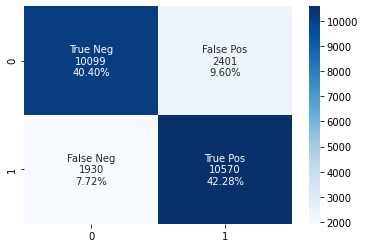

In [21]:
import seaborn as sns


group_names = ["True Neg","False Pos","False Neg","True Pos"]

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
                
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')